# PREDICTIVE MODEL FOR SEATTLE VEHICLE COLLISION

## CAPSTONE PROJECT

INTRODUCTION

BACKGROUND:
In the modern world road traffic accidents are very common in each and every part of the world. Seattle is one the busiest cities and as of 2017, there have been more than 11,000 motor vehicle-involved collisions per year. These collisions not only lead to high property damage but may result in injuries and in worst case scenarios even death. In 2017, a total of 187 fatal and serious injury collisions were reported on Seattle streets. The causes behind the collisions may range from physical factors like road conditions, lighting, weather, time of day etc to human factors like inattention, speeding, under influence. Various efforts and steps can be taken in order to minimize these collisions. Every city has devised certain traffic rules and regulations to help in this regard. Even, WHO has given certain recommendation to be followed by the government agencies to have an impact on the rate collisions and more importantly to reduce the cost of property damage as well as of life. Even small regulations sometimes have much greater impact. 

PROBLEM:
To predict the severity of collision based on the various physical and human factors. And make recommendations and take necessary actions based on those predictions like improving the road conditions, lighting, regulations on speed in various area etc.

STAKEHOLDERS: 

General Public- vehicle drivers and pedestrians to take necessary precautions in certain circumstances.

Seattle Traffic department- to prepare plans regarding improving road conditions, lightning, speeding limits, etc

Car manufacturing industry- To increase car re-enforcements at the different sites of cars which are frequently involved and especially responsible for the most serious injuries and fatalities.

Weather department- to make necessary updates and caution messages for different locations depending upon weather.

Health and paramedical departments- to take necessary steps to provide faster emergencies services in the areas more prone to accidents to reduce the loss of life.




In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


### DATA. 
Data utilized for this analysis was downloaded from Kaggle Seattle collision dataset as csv file.
http://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv


In [134]:
#first load the data set for seattle collision from Kaggle site. 
df=pd.read_csv("http://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv")

In [135]:
#it is a big data set
df.shape


(221738, 40)

In [136]:
df.describe()

,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,214260.000000,214260.000000,221738.000000,221738.000000,221738.000000,72027.000000,221738.000000,221738.000000,221738.000000,221738.000000,221738.000000,221738.000000,221738.000000,221737.000000,1.272050e+05,221738.000000,2.217380e+05
mean,-122.330753,47.620191,110869.500000,145006.735517,145236.969811,37636.986713,2.226741,0.038095,0.027352,1.729442,0.373964,0.015203,0.001700,13.383305,7.971063e+06,262.624791,9.568044e+03
std,0.030058,0.056059,64010.391332,89372.351774,89749.554004,52000.820955,1.469699,0.201704,0.164512,0.830529,0.732050,0.158004,0.044967,7.298289,2.611523e+06,3252.882590,7.142784e+04
min,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,-122.349280,47.577106,55435.250000,71721.250000,71721.250000,28653.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,6.007029e+06,0.000000,0.000000e+00
50%,-122.330363,47.616033,110869.500000,127358.500000,127358.500000,29973.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,8.033011e+06,0.000000,0.000000e+00
75%,-122.311998,47.664290,166303.750000,210118.750000,210338.750000,33984.000000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,14.000000,1.018101e+07,0.000000,0.000000e+00
max,-122.238949,47.734142,221738.000000,334276.000000,335776.000000,764413.000000,93.000000,6.000000,2.000000,15.000000,78.000000,41.000000,5.000000,87.000000,1.307202e+07,525241.000000,5.239700e+06


## DATA CLEANING AND UNDERSTANDING

In [137]:
df.head(10)

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.356511,47.517361,1,327920,329420,3856094,Matched,Intersection,34911.0,17TH AVE SW AND SW ROXBURY ST,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,-122.361405,47.702064,2,46200,46200,1791736,Matched,Block,NaN,HOLMAN RD NW BETWEEN 4TH AVE NW AND 3RD AVE NW,...,Wet,Dusk,NaN,5101020.0,NaN,13,From same direction - both going straight - bo...,0,0,N
2,-122.317414,47.664028,3,1212,1212,3507861,Matched,Block,NaN,ROOSEVELT WAY NE BETWEEN NE 47TH ST AND NE 50T...,...,Dry,Dark - Street Lights On,NaN,NaN,NaN,30,From opposite direction - all others,0,0,N
3,-122.318234,47.619927,4,327909,329409,EA03026,Matched,Intersection,29054.0,11TH AVE E AND E JOHN ST,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,0,Vehicle going straight hits pedestrian,0,0,N
4,-122.351724,47.560306,5,104900,104900,2671936,Matched,Block,NaN,WEST MARGINAL WAY SW BETWEEN SW ALASKA ST AND ...,...,Ice,Dark - Street Lights On,NaN,9359012.0,Y,50,Fixed object,0,0,N
5,-122.333067,47.544302,6,322205,323705,3694789,Matched,Block,NaN,1ST AV S NB OFF RP BETWEEN 1ST AV S BR NB AND ...,...,Dry,Daylight,NaN,NaN,NaN,14,From same direction - both going straight - on...,0,0,N
6,-122.338543,47.616874,7,322275,323775,E949282,Matched,Block,NaN,8TH AVE BETWEEN WESTLAKE AVE AND BLANCHARD ST,...,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,0,0,N
7,NaN,NaN,8,5721,5721,1786583,Unmatched,NaN,NaN,NaN,...,Dry,Daylight,NaN,3239035.0,NaN,32,One parked--one moving,0,0,N
8,-122.360959,47.571594,9,33400,33400,1076890,Matched,Block,NaN,WEST SEATTLE BR WB BETWEEN W SEATTLE BR WB OFF...,...,Dry,Daylight,NaN,5187041.0,NaN,13,From same direction - both going straight - bo...,0,0,N
9,-122.336856,47.655652,10,20400,20400,1220377,Matched,Block,NaN,N 40TH ST BETWEEN DENSMORE AVE N AND WALLINGFO...,...,Wet,Dusk,NaN,4216016.0,NaN,14,From same direction - both going straight - on...,0,0,N


In [138]:
# to see the parameters of the dataset.
df.columns

Index(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

The dataset includes data regarding the severity of collisions and various parameters associated with it in the city of Seattle from year 2004 till now. 
After exploring the data, we found to have 40 parameters, among those
 
'OBJECTID',
'INCKEY',
'COLDETKEY',
'REPORTNO',
'STATUS',
'EXCEPTRSNCODE'
'EXCEPTRSNDESC',
'SDOT_COLCODE',
'PEDROWNOTGRNT
'ST_COLCODE',
'SDOTCOLNUM',
'SEGLANEKEY',
'CROSSWALKKEY',
'HITPARKEDCAR’


 
were found to be least relevant.

 Parameters like 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'EXCEPTRSNCODE','SDOT_COLCODE', 'ST_COLCODE','SDOTCOLNUM','SEGLANEKEY', 'CROSSWALKKEY' mostly consisted of some unique number or code assigned to each case which did not add any more useful information to the analysis.



In [139]:
#drop the parameters which are found to be least relevant to the project.
df=df.drop(['INCKEY', 'OBJECTID','COLDETKEY','REPORTNO', 'STATUS','EXCEPTRSNCODE', 'EXCEPTRSNDESC','PEDROWNOTGRNT', 'SDOT_COLCODE', 'SDOTCOLNUM','INTKEY','ST_COLCODE','SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],axis=1)

### DATE TIME PARAMETERS

 

Parameters “INCDTTM” and ‘INCDATE” were utilised to form columns like “Year”, “Month”, “Weekday” “Hour” and “TIMEOFDAY”. TIMEOFDAY column was created to see relation ship between the severity of accidents and the time of the day like early morning, morning, noon, evening, night and late night. Columns “INCDTTM” AND “INCDATE” were also eventually dropped.



In [140]:
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'], errors='coerce')
df['INCDATE'] =pd.to_datetime(df['INCDATE'], errors='coerce')
df['Month']=df['INCDTTM'].dt.month
df['Weekday']=df['INCDTTM'].dt.weekday
df['Hour']=df['INCDTTM'].dt.hour
df['Year']=df['INCDATE'].dt.year

In [141]:
df.head()

,X,Y,ADDRTYPE,LOCATION,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ST_COLDESC,Month,Weekday,Hour,Year
0,-122.356511,47.517361,Intersection,17TH AVE SW AND SW ROXBURY ST,1,Property Damage Only Collision,Angles,2,0,0,...,N,Clear,Dry,Daylight,NaN,Entering at angle,1,6,9,2020
1,-122.361405,47.702064,Block,HOLMAN RD NW BETWEEN 4TH AVE NW AND 3RD AVE NW,1,Property Damage Only Collision,Rear Ended,2,0,0,...,0,Raining,Wet,Dusk,NaN,From same direction - both going straight - bo...,4,0,18,2005
2,-122.317414,47.664028,Block,ROOSEVELT WAY NE BETWEEN NE 47TH ST AND NE 50T...,2,Injury Collision,Head On,2,0,0,...,N,Clear,Dry,Dark - Street Lights On,NaN,From opposite direction - all others,3,6,2,2013
3,-122.318234,47.619927,Intersection,11TH AVE E AND E JOHN ST,2,Injury Collision,Pedestrian,3,1,0,...,N,Raining,Wet,Dark - Street Lights On,NaN,Vehicle going straight hits pedestrian,1,0,17,2020
4,-122.351724,47.560306,Block,WEST MARGINAL WAY SW BETWEEN SW ALASKA ST AND ...,2,Injury Collision,Other,2,0,0,...,0,Clear,Ice,Dark - Street Lights On,Y,Fixed object,12,4,19,2009


In [10]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    openssl-1.1.1h             |       h516909a_0         2.1 MB  conda-forge
    certifi-2020.6.20          |   py36h9880bd3_2         151 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    ------------------------------------------------------------
                       

In [217]:
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [11]:
import folium

In [12]:
world_geo = r'world_countries.json'

In [13]:
SEATTLE_map = folium.Map(location=[47.6062, -122.3321], zoom_start=12)

In [14]:
SEATTLE_map

In [142]:
df['LOCATION'].value_counts().to_frame()

,LOCATION
BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N,298
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N,297
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB,291
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,283
6TH AVE AND JAMES ST,276
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,270
RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST,258
ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ON RP AND SENECA ST OFF RP,256
ALASKAN WY VI SB BETWEEN COLUMBIA ST ON RP AND ALASKAN WY VI SB EFR OFF RP,230
WEST SEATTLE BR EB BETWEEN ALASKAN WY VI NB ON RP AND DELRIDGE-W SEATTLE BR EB ON RP,225


In [143]:
df['Month'].value_counts().to_frame()

,Month
10,20051
5,19086
6,19059
7,19005
8,18954
11,18654
1,18570
3,18157
9,18018
4,17936


In [144]:
df['Hour'].value_counts().to_frame()

,Hour
0,56498
17,13360
16,12477
15,11879
14,10921
12,10684
13,10497
18,10072
8,8791
11,8422


In [145]:
df['Year'].value_counts().to_frame()

,Year
2005,16016
2006,15794
2004,15457
2007,15082
2015,14260
2008,14139
2016,13955
2009,13275
2014,13212
2013,12757


In [146]:
pd.DataFrame({'TIME' : ['0 to 4', '4 to 8 ', '8 to 12', '12 to 16', '16 to 20', '20 to 0']},
             index=['Late Night', 'Early Morning','Morning','Noon','Eve','Night'])

,TIME
Late Night,0 to 4
Early Morning,4 to 8
Morning,8 to 12
Noon,12 to 16
Eve,16 to 20
Night,20 to 0


In [147]:

b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Noon','Eve','Night']
df["TIMEOFDAY"] = pd.cut(x=df['Hour'], bins=b, labels=l, include_lowest=True)

In [148]:
df.head()


,X,Y,ADDRTYPE,LOCATION,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,...,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ST_COLDESC,Month,Weekday,Hour,Year,TIMEOFDAY
0,-122.356511,47.517361,Intersection,17TH AVE SW AND SW ROXBURY ST,1,Property Damage Only Collision,Angles,2,0,0,...,Clear,Dry,Daylight,NaN,Entering at angle,1,6,9,2020,Morning
1,-122.361405,47.702064,Block,HOLMAN RD NW BETWEEN 4TH AVE NW AND 3RD AVE NW,1,Property Damage Only Collision,Rear Ended,2,0,0,...,Raining,Wet,Dusk,NaN,From same direction - both going straight - bo...,4,0,18,2005,Eve
2,-122.317414,47.664028,Block,ROOSEVELT WAY NE BETWEEN NE 47TH ST AND NE 50T...,2,Injury Collision,Head On,2,0,0,...,Clear,Dry,Dark - Street Lights On,NaN,From opposite direction - all others,3,6,2,2013,Late Night
3,-122.318234,47.619927,Intersection,11TH AVE E AND E JOHN ST,2,Injury Collision,Pedestrian,3,1,0,...,Raining,Wet,Dark - Street Lights On,NaN,Vehicle going straight hits pedestrian,1,0,17,2020,Eve
4,-122.351724,47.560306,Block,WEST MARGINAL WAY SW BETWEEN SW ALASKA ST AND ...,2,Injury Collision,Other,2,0,0,...,Clear,Ice,Dark - Street Lights On,Y,Fixed object,12,4,19,2009,Eve


In [149]:
df=df.drop(['INCDATE','INCDTTM'], axis=1)


In [150]:
df.columns

Index(['X', 'Y', 'ADDRTYPE', 'LOCATION', 'SEVERITYCODE', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INJURIES', 'SERIOUSINJURIES', 'FATALITIES', 'JUNCTIONTYPE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'SPEEDING', 'ST_COLDESC', 'Month', 'Weekday', 'Hour',
       'Year', 'TIMEOFDAY'],
      dtype='object')

In [151]:
#Values for parameter UNDERINFL
df['UNDERINFL'].value_counts().to_frame()

,UNDERINFL
N,104002
0,81676
Y,5399
1,4230


In [152]:
#'UNDERINFL’ column had values of “N”,” Y”,”1”,”0”. So “1” and ”0” were converted to “Y” and “N” respectively.

def for_UNDERINFL(x):
    if x in ['Y','1']:
        return "Y"
    elif x in ['N','0']:
        return "N"
    else:
        return x
    
df["UNDERINFL"] = df["UNDERINFL"].apply(for_UNDERINFL)

In [153]:
df['UNDERINFL'].value_counts().to_frame()

,UNDERINFL
N,185678
Y,9629


In [154]:
df['SEVERITYDESC'].value_counts().to_frame()

,SEVERITYDESC
Property Damage Only Collision,137776
Injury Collision,58842
Unknown,21657
Serious Injury Collision,3111
Fatality Collision,352


### DEALING WITH MISSING DATA

In [155]:
df[['X', 'Y', 'ADDRTYPE', 'LOCATION', 'SEVERITYCODE', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INJURIES', 'SERIOUSINJURIES', 'FATALITIES',
       'JUNCTIONTYPE', 'SDOT_COLDESC', 'INATTENTIONIND',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'ST_COLDESC']].isnull().sum()

X                    7478
Y                    7478
ADDRTYPE             3714
LOCATION             4593
SEVERITYCODE            1
SEVERITYDESC            0
COLLISIONTYPE       26451
PERSONCOUNT             0
PEDCOUNT                0
PEDCYLCOUNT             0
VEHCOUNT                0
INJURIES                0
SERIOUSINJURIES         0
FATALITIES              0
JUNCTIONTYPE        11979
SDOT_COLDESC            1
INATTENTIONIND     191550
UNDERINFL           26431
WEATHER             26641
ROADCOND            26560
LIGHTCOND           26730
SPEEDING           211802
ST_COLDESC          26451
dtype: int64



All the NAN values for parameters '' ADDRTYPE, 'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING','ST_COLDESC were converted to either “Unknown” or “not mentioned” or “not stated” value.

‘INATTENTION’ and ‘SPEEDING’ columns were found to have only “Y” values. So, it was safe to consider that all NAN values would be “N”.


After all this there were missing values for only the parameters “X”,” Y” and “LOCATION”.


In [156]:

df['SEVERITYCODE'].value_counts().to_frame()

,SEVERITYCODE
1,137776
2,58842
0,21656
2b,3111
3,352


In [157]:
df['SEVERITYDESC'].value_counts().to_frame()

,SEVERITYDESC
Property Damage Only Collision,137776
Injury Collision,58842
Unknown,21657
Serious Injury Collision,3111
Fatality Collision,352


In [158]:
df["SEVERITYCODE"].fillna('0', inplace=True)
df.columns

Index(['X', 'Y', 'ADDRTYPE', 'LOCATION', 'SEVERITYCODE', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INJURIES', 'SERIOUSINJURIES', 'FATALITIES', 'JUNCTIONTYPE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'SPEEDING', 'ST_COLDESC', 'Month', 'Weekday', 'Hour',
       'Year', 'TIMEOFDAY'],
      dtype='object')

In [159]:
df['ADDRTYPE'].value_counts()

Block           145118
Intersection     72027
Alley              879
Name: ADDRTYPE, dtype: int64

In [160]:
df["ADDRTYPE"].fillna('not mentioned', inplace=True)

In [161]:
df['SEVERITYDESC'].value_counts()

Property Damage Only Collision    137776
Injury Collision                   58842
Unknown                            21657
Serious Injury Collision            3111
Fatality Collision                   352
Name: SEVERITYDESC, dtype: int64

In [162]:
df["SEVERITYDESC"].fillna('unknown', inplace=True)
df['COLLISIONTYPE'].value_counts()

Parked Car    48558
Angles        35589
Rear Ended    34706
Other         24601
Sideswipe     18900
Left Turn     14121
Pedestrian     7669
Cycles         5936
Right Turn     3018
Head On        2189
Name: COLLISIONTYPE, dtype: int64

In [163]:
df['COLLISIONTYPE'].fillna('unknown', inplace=True)
df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              101823
At Intersection (intersection related)                69317
Mid-Block (but intersection related)                  24412
Driveway Junction                                     11497
At Intersection (but not related to intersection)      2499
Ramp Junction                                           190
Unknown                                                  21
Name: JUNCTIONTYPE, dtype: int64

In [164]:
df['JUNCTIONTYPE'].fillna('Unknown', inplace=True)
df['INATTENTIONIND'].value_counts()

Y    30188
Name: INATTENTIONIND, dtype: int64

In [165]:
df["INATTENTIONIND"].fillna('N', inplace=True)
df['UNDERINFL'].value_counts()

N    185678
Y      9629
Name: UNDERINFL, dtype: int64

In [166]:
df["UNDERINFL"].fillna('unknown', inplace=True)
df['WEATHER'].value_counts()


Clear                       114807
Raining                      34038
Overcast                     28556
Unknown                      15131
Snowing                        919
Other                          860
Fog/Smog/Smoke                 577
Sleet/Hail/Freezing Rain       116
Blowing Sand/Dirt               56
Severe Crosswind                26
Partly Cloudy                   10
Blowing Snow                     1
Name: WEATHER, dtype: int64

In [167]:
df["WEATHER"].fillna('Unknown', inplace=True)
df['ROADCOND'].value_counts()

Dry               128660
Wet                48737
Unknown            15139
Ice                 1232
Snow/Slush          1014
Other                136
Standing Water       119
Sand/Mud/Dirt         77
Oil                   64
Name: ROADCOND, dtype: int64

In [168]:
df['SDOT_COLDESC'].value_counts()

MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE                  92182
MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END                            59371
NOT ENOUGH INFORMATION / NOT APPLICABLE                                 19164
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE                 10945
MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT                            9609
MOTOR VEHCILE STRUCK PEDESTRIAN                                          7701
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE                   6889
MOTOR VEHICLE STRUCK OBJECT IN ROAD                                      5075
MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE                    3439
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE                 1826
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE                  1781
PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT ANGLE                     1472
MOTOR VEHICLE OVERTURNED IN ROAD                                

In [169]:
df["ROADCOND"].fillna('Unknown', inplace=True)
df['LIGHTCOND'].value_counts()


Daylight                    119555
Dark - Street Lights On      50139
Unknown                      13533
Dusk                          6085
Dawn                          2609
Dark - No Street Lights       1580
Dark - Street Lights Off      1239
Other                          244
Dark - Unknown Lighting         24
Name: LIGHTCOND, dtype: int64

In [170]:
df["LIGHTCOND"].fillna('Unknown', inplace=True)
df['SPEEDING'].value_counts()

Y    9936
Name: SPEEDING, dtype: int64

In [171]:


df["SPEEDING"].fillna('N', inplace=True)
df['ST_COLDESC'].value_counts()

One parked--one moving                                                                   44937
Entering at angle                                                                        35589
From same direction - both going straight - one stopped - rear-end                       26216
Fixed object                                                                             14174
From same direction - both going straight - both moving - sideswipe                      12972
From opposite direction - one left turn - one straight                                   10693
From same direction - both going straight - both moving - rear-end                        7790
Vehicle - Pedalcyclist                                                                    5082
From same direction - all others                                                          4628
Vehicle going straight hits pedestrian                                                    3571
From same direction - one left turn - one straight

In [172]:
df["ST_COLDESC"].fillna('Not stated', inplace=True)
df.isnull().sum()

X                  7478
Y                  7478
ADDRTYPE              0
LOCATION           4593
SEVERITYCODE          0
SEVERITYDESC          0
COLLISIONTYPE         0
PERSONCOUNT           0
PEDCOUNT              0
PEDCYLCOUNT           0
VEHCOUNT              0
INJURIES              0
SERIOUSINJURIES       0
FATALITIES            0
JUNCTIONTYPE          0
SDOT_COLDESC          1
INATTENTIONIND        0
UNDERINFL             0
WEATHER               0
ROADCOND              0
LIGHTCOND             0
SPEEDING              0
ST_COLDESC            0
Month                 0
Weekday               0
Hour                  0
Year                  0
TIMEOFDAY             0
dtype: int64

In [173]:
#Before dropping the rows with NAN values for these parameters we analysed the top 15 locations with maximum number of accidents.

In [174]:


x=df["LOCATION"].value_counts().to_frame()
df_toplocation=x.head(15)
df_toplocation



,LOCATION
BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N,298
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N,297
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB,291
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,283
6TH AVE AND JAMES ST,276
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,270
RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST,258
ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ON RP AND SENECA ST OFF RP,256
ALASKAN WY VI SB BETWEEN COLUMBIA ST ON RP AND ALASKAN WY VI SB EFR OFF RP,230
WEST SEATTLE BR EB BETWEEN ALASKAN WY VI NB ON RP AND DELRIDGE-W SEATTLE BR EB ON RP,225


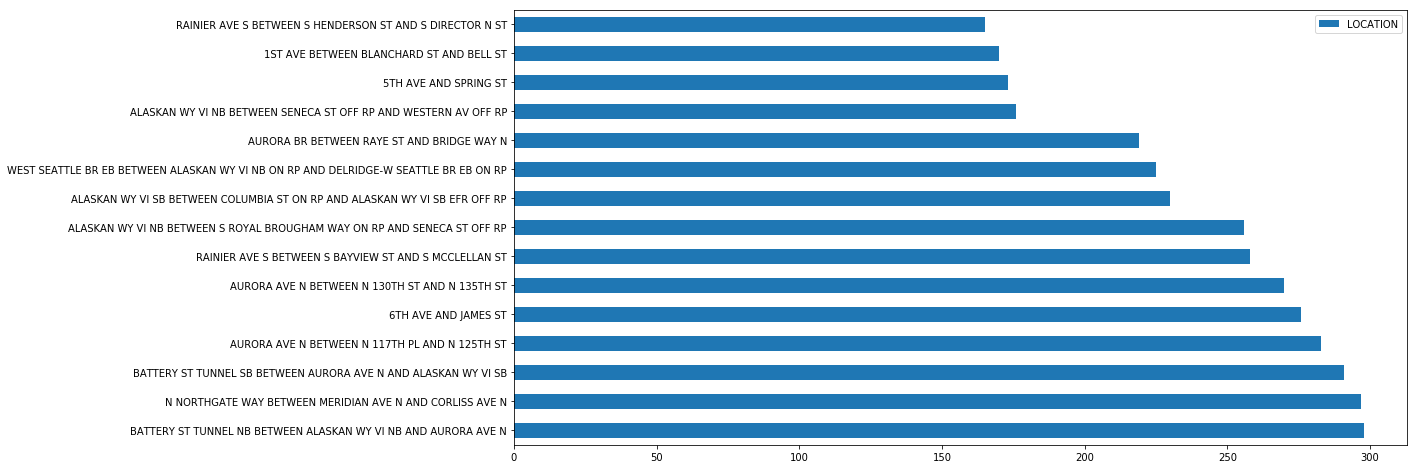

In [175]:
df_toplocation.plot(kind='barh', figsize=(16,8))
plt.x_label='Location'
plt.y_label='Number of accidents'
plt.title='Top 15 accident locations'
plt.show()

BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N	was found to be the location with most accidents about 298.

In [176]:
df.isnull().sum()

X                  7478
Y                  7478
ADDRTYPE              0
LOCATION           4593
SEVERITYCODE          0
SEVERITYDESC          0
COLLISIONTYPE         0
PERSONCOUNT           0
PEDCOUNT              0
PEDCYLCOUNT           0
VEHCOUNT              0
INJURIES              0
SERIOUSINJURIES       0
FATALITIES            0
JUNCTIONTYPE          0
SDOT_COLDESC          1
INATTENTIONIND        0
UNDERINFL             0
WEATHER               0
ROADCOND              0
LIGHTCOND             0
SPEEDING              0
ST_COLDESC            0
Month                 0
Weekday               0
Hour                  0
Year                  0
TIMEOFDAY             0
dtype: int64

In [177]:
### df.shape

Target parameters were selected to SEVERITYDESC and FATALITIES. Since SEVERITY DESC AND SEVERITYCODE have the same information SEVERITYCODE was dropped. Also the unknown values of SEVERITYDESC were replaced by NAN and dropped.SEVERITYDESC values were also put into two categoreies 
PROPERTY DAMAGE ONLY=1
INJURIES, SERIOUS INJURIES AND FATALITIES=2

In [178]:
df=df.drop(['SEVERITYCODE'], axis=1)

In [179]:
df2=df

In [180]:
df2=df.drop(['X','Y','LOCATION'],axis=1)


In [181]:
df2['SEVERITYDESC'].value_counts().to_frame

<bound method Series.to_frame of Property Damage Only Collision    137776
Injury Collision                   58842
Unknown                            21657
Serious Injury Collision            3111
Fatality Collision                   352
Name: SEVERITYDESC, dtype: int64>

In [182]:
df2['SEVERITYDESC'].replace(to_replace={'Unknown': np.nan, 
                        'Other':np.nan}, inplace=True)

In [183]:
df2=df2.dropna(axis=0)

In [184]:
df2['SEVERITYDESC'].replace(to_replace={'Property Damage Only Collision':'Property Damage Only Collision', 'Injury Collision':'Injuries','Serious Injury Collision':'Injuries','Fatality Collision':'Injuries'}, inplace=True)

In [185]:
df2.shape

(200081, 24)

In [186]:
df2['SEVERITYDESC'].value_counts().to_frame

<bound method Series.to_frame of Property Damage Only Collision    137776
Injuries                           62305
Name: SEVERITYDESC, dtype: int64>

In [187]:
df_accidents=df2

In [188]:
df_accidents.shape

(200081, 24)

After assessing the data, parameters like ST_COLDESC and SDOT_COLDESC were found to have more or less similar enteries. So we decided to drop one of them. ALso parameters like injuries, serious injuries and fatalities k,

In [189]:
df_accidents=df_accidents.drop(['ST_COLDESC'], axis=1)

In [190]:
df_accidents.head()

,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,Month,Weekday,Hour,Year,TIMEOFDAY
0,Intersection,Property Damage Only Collision,Angles,2,0,0,2,0,0,0,...,N,Clear,Dry,Daylight,N,1,6,9,2020,Morning
1,Block,Property Damage Only Collision,Rear Ended,2,0,0,2,0,0,0,...,N,Raining,Wet,Dusk,N,4,0,18,2005,Eve
2,Block,Injuries,Head On,2,0,0,2,1,0,0,...,N,Clear,Dry,Dark - Street Lights On,N,3,6,2,2013,Late Night
3,Intersection,Injuries,Pedestrian,3,1,0,1,1,0,0,...,N,Raining,Wet,Dark - Street Lights On,N,1,0,17,2020,Eve
4,Block,Injuries,Other,2,0,0,1,1,0,0,...,N,Clear,Ice,Dark - Street Lights On,Y,12,4,19,2009,Eve


In [191]:
df_accidents.isnull().sum()

ADDRTYPE           0
SEVERITYDESC       0
COLLISIONTYPE      0
PERSONCOUNT        0
PEDCOUNT           0
PEDCYLCOUNT        0
VEHCOUNT           0
INJURIES           0
SERIOUSINJURIES    0
FATALITIES         0
JUNCTIONTYPE       0
SDOT_COLDESC       0
INATTENTIONIND     0
UNDERINFL          0
WEATHER            0
ROADCOND           0
LIGHTCOND          0
SPEEDING           0
Month              0
Weekday            0
Hour               0
Year               0
TIMEOFDAY          0
dtype: int64

At the end we had the following parameters for analysis.

|PARAMETERS                         |                                  	Description.                                                                 |                    
|-----------------------------------|----------------------------------------------------------------------------------------------------------------|
|COLLISIONTYPE                      |                           Type of collision rear, side swipe etc                                               |
|ADDRTYPE	                        |                            Whether collision occurred at block or intersection                                 | 
|SEVERITYDESC                       |                           Description of severity, property damage, injuries, serious injuries, fatalities etc.|
|JUNCTIONTYPE	                    |                            Type of junction, intersection, ramp, etc                                           |
|SDOT_COLDESC	                    |                            Type of collision with a car, pedestrian, sidehit etc.                              |
|INATTENTIONIND	                    |                            Whether the collision occurred due to inattention                                   |
|UNDERINFL	                        |                            Whether the collision occurred to the person being under influence                  |
|WEATHER                            |                          	Condition of weather at the time of accident                                         |
|ROADCOND	                        |                            Condition of road at the time of accident                                          |
|LIGHTCOND	                        |                            Status of lighting at the time of accident                                          |
|SPEEDING	                        |                            Whether the collision occurred when the vehicle  was speeding.                    	 |
|Weekday                            |                         	Weekday the collision occurred                                                       |
|Hour	                            |                            The hour the collision occurred                                                     |
|Year	                            |                            The year the collision occurred                                                     |
|Month	                            |                            The month in which the collision occurred                                           |
|TIMEOFDAY	                        |                         Time of the day at the time of accident , morning, noon, evening, night, late night etc|
|PERSONCOUNT                        |                         	Number of persons involved in accident                                               |
|PEDCOUNT	                        |                            Number of pedestrians involved in accident                                          |
|PEDCYCLIST COUNT	                |                            Number of cyclists involved in accident                                             |
|VEHICLE COUNT                      |                           	Number of vehicles involved in accident                                          |






## DATA VISUALISATION

### COLLISION SEVERITY

In [192]:
df_accidents["SEVERITYDESC"].value_counts().to_frame()

,SEVERITYDESC
Property Damage Only Collision,137776
Injuries,62305


[Text(0, 0, 'Property Damage Only Collision'), Text(0, 0, 'Injuries')]

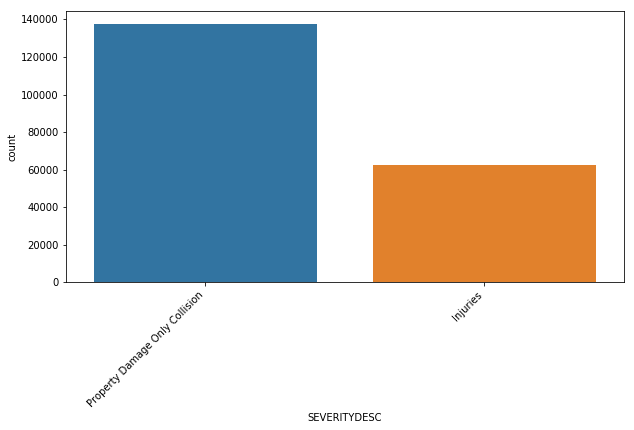

In [193]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(df_accidents["SEVERITYDESC"],ax=ax) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

 Property damage was seen more frequent than the injuries especially fatalities with creates the imbalanced dataset. Thus, for machine learning we will have to create a balanced dataset which can be done either by oversampling the minority dataset or under sampling the majority dataset or both.


### ADDRESS TYPE

In [194]:
df_accidents["ADDRTYPE"].value_counts().to_frame()

,ADDRTYPE
Block,129852
Intersection,67532
not mentioned,1933
Alley,764


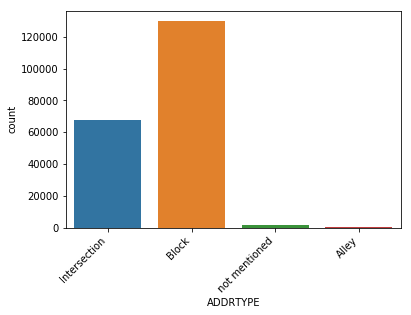

In [195]:

ax = sns.countplot(df_accidents['ADDRTYPE'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

### COLLISION TYPE

In [196]:
df_accidents["COLLISIONTYPE"].value_counts().to_frame()

,COLLISIONTYPE
Parked Car,48558
Angles,35588
Rear Ended,34706
Other,24601
Sideswipe,18900
Left Turn,14121
Pedestrian,7668
Cycles,5936
unknown,4796
Right Turn,3018


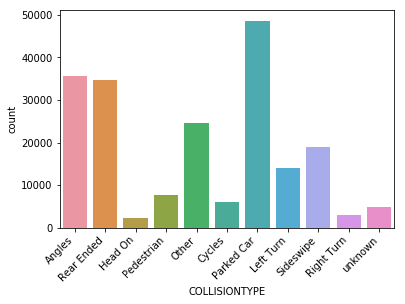

In [197]:
ax = sns.countplot(df_accidents['COLLISIONTYPE'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

### INATTENTION

In [198]:
df_accidents["INATTENTIONIND"].value_counts().to_frame()

,INATTENTIONIND
N,169893
Y,30188


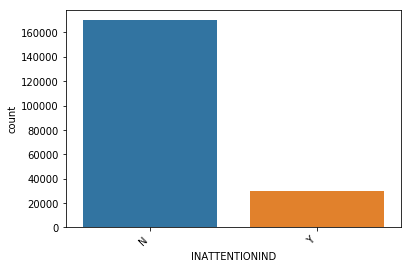

In [199]:
ax = sns.countplot(df_accidents['INATTENTIONIND'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

### JUNCTIONTYPE

In [200]:
df_accidents["JUNCTIONTYPE"].value_counts().to_frame()

,JUNCTIONTYPE
Mid-Block (not related to intersection),92224
At Intersection (intersection related),65233
Mid-Block (but intersection related),23079
Driveway Junction,10852
Unknown,6392
At Intersection (but not related to intersection),2130
Ramp Junction,171


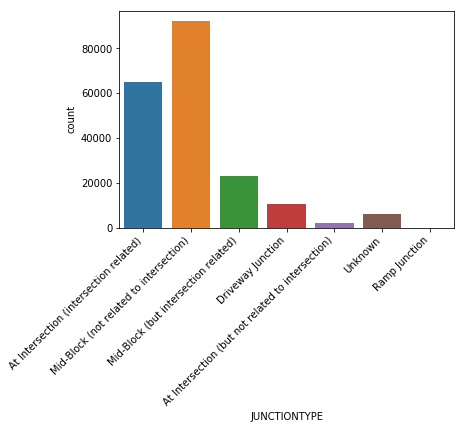

In [201]:
ax = sns.countplot(df_accidents['JUNCTIONTYPE'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

### ROAD CONDITION.

In [202]:
df_accidents["ROADCOND"].value_counts().to_frame()

,ROADCOND
Dry,128660
Wet,48734
Unknown,20045
Ice,1232
Snow/Slush,1014
Other,136
Standing Water,119
Sand/Mud/Dirt,77
Oil,64


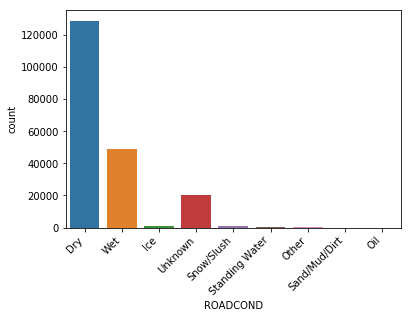

In [203]:
ax = sns.countplot(df_accidents['ROADCOND'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

### LIGHT CONDITION

In [204]:
df_accidents["LIGHTCOND"].value_counts().to_frame()

,LIGHTCOND
Daylight,119552
Dark - Street Lights On,50139
Unknown,18609
Dusk,6085
Dawn,2609
Dark - No Street Lights,1580
Dark - Street Lights Off,1239
Other,244
Dark - Unknown Lighting,24


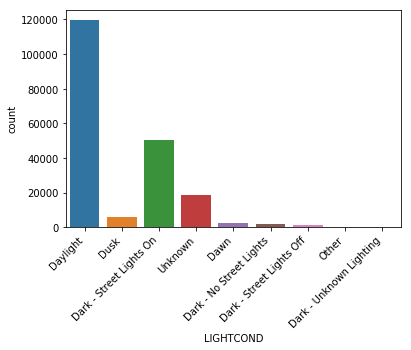

In [205]:
ax = sns.countplot(df_accidents['LIGHTCOND'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

### WEATHER

In [206]:
df_accidents["WEATHER"].value_counts().to_frame()

,WEATHER
Clear,114806
Raining,34037
Overcast,28555
Unknown,20118
Snowing,919
Other,860
Fog/Smog/Smoke,577
Sleet/Hail/Freezing Rain,116
Blowing Sand/Dirt,56
Severe Crosswind,26


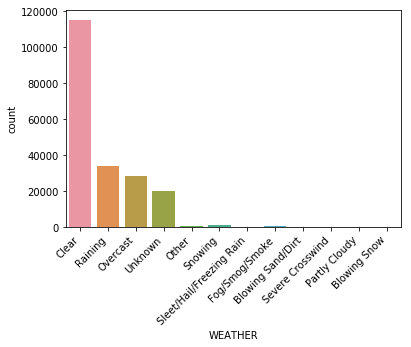

In [207]:
ax = sns.countplot(df_accidents['WEATHER'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

### SPEEDING

In [208]:
df_accidents["SPEEDING"].value_counts().to_frame()

,SPEEDING
N,190146
Y,9935


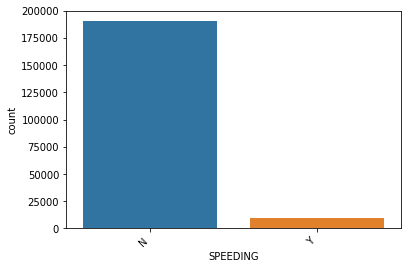

In [209]:
ax = sns.countplot(df_accidents['SPEEDING'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

### UNDER INFLUENCE

In [210]:
df_accidents["UNDERINFL"].value_counts().to_frame()

,UNDERINFL
N,185676
Y,9629
unknown,4776


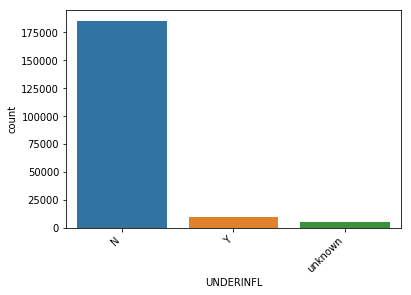

In [211]:
ax = sns.countplot(df_accidents['UNDERINFL'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

### COLLISIONS YEARWISE

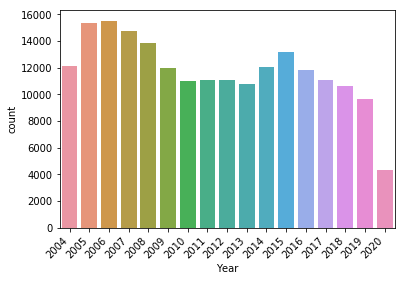

In [212]:
ax = sns.countplot(df_accidents['Year'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

### COLLISIONS AS PER TIME OF THE DAY

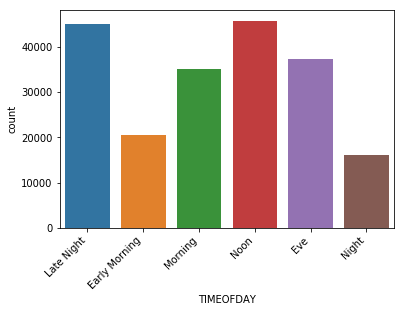

In [213]:
ax = sns.countplot(df_accidents['TIMEOFDAY'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

### COLLISIONS AS PER DAY OF THE WEEK

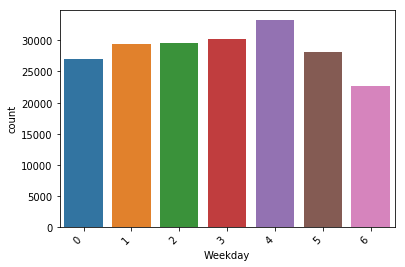

In [214]:
ax = sns.countplot(df_accidents['Weekday'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

### RELATIONSHIP BETWEEN COLLISIONTYPE AND SEVERITY OF COLLISION

In [215]:
crosstab1=pd.crosstab(index=df_accidents["COLLISIONTYPE"],columns=df_accidents["SEVERITYDESC"])
crosstab1

SEVERITYDESC,Injuries,Property Damage Only Collision
COLLISIONTYPE,,
Angles,14297,21291
Cycles,5256,680
Head On,1017,1172
Left Turn,5755,8366
Other,6796,17805
Parked Car,2849,45709
Pedestrian,6990,678
Rear Ended,15067,19639
Right Turn,643,2375


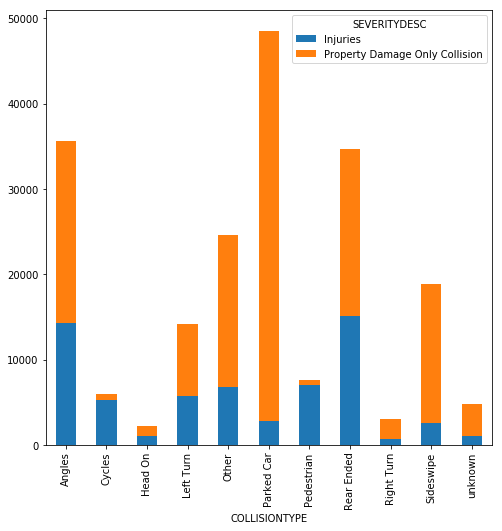

In [216]:
crosstab1.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [217]:
crosstab2=pd.crosstab(index=df_accidents["JUNCTIONTYPE"],columns=df_accidents["SEVERITYDESC"])
crosstab2

SEVERITYDESC,Injuries,Property Damage Only Collision
JUNCTIONTYPE,,
At Intersection (but not related to intersection),653,1477
At Intersection (intersection related),29190,36043
Driveway Junction,3392,7460
Mid-Block (but intersection related),7537,15542
Mid-Block (not related to intersection),21048,71176
Ramp Junction,59,112
Unknown,426,5966


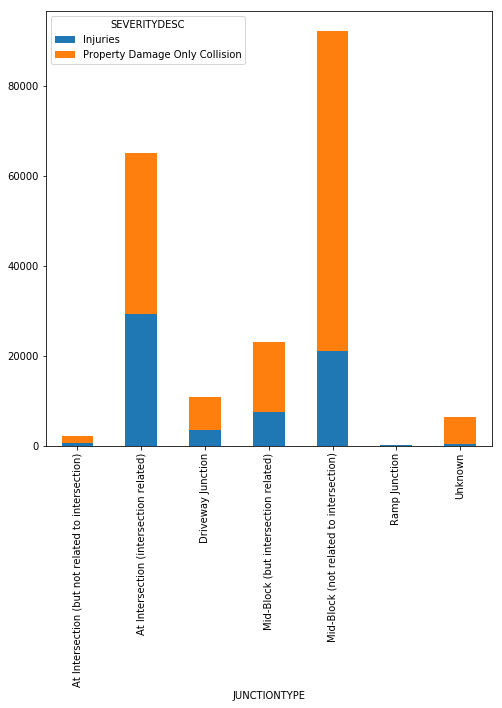

In [218]:
crosstab2.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [219]:
df_accidents.columns

Index(['ADDRTYPE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES', 'FATALITIES',
       'JUNCTIONTYPE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'Month', 'Weekday',
       'Hour', 'Year', 'TIMEOFDAY'],
      dtype='object')

In [220]:
crosstab3=pd.crosstab(index=df_accidents["INATTENTIONIND"],columns=df_accidents["SEVERITYDESC"])
crosstab3

SEVERITYDESC,Injuries,Property Damage Only Collision
INATTENTIONIND,,
N,51527,118366
Y,10778,19410


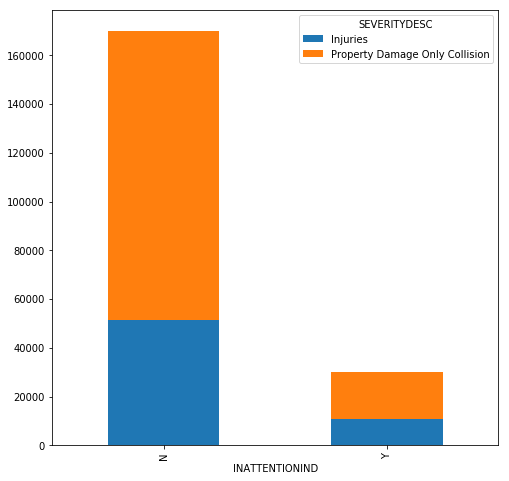

In [221]:
crosstab3.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [222]:
crosstab4=pd.crosstab(index=df_accidents["UNDERINFL"],columns=df_accidents["SEVERITYDESC"])
crosstab4

SEVERITYDESC,Injuries,Property Damage Only Collision
UNDERINFL,,
N,57236,128440
Y,4067,5562
unknown,1002,3774


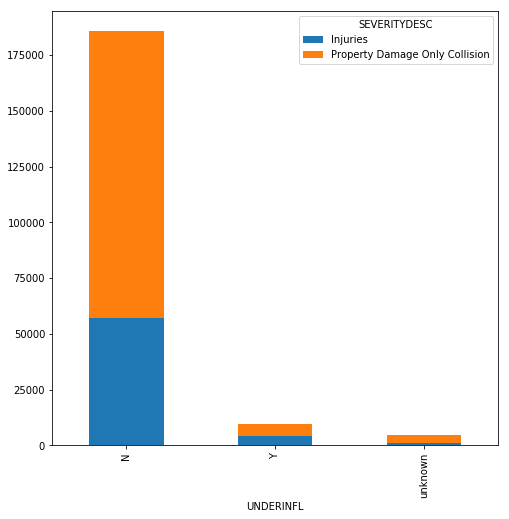

In [223]:

crosstab4.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [224]:
crosstab5=pd.crosstab(index=df_accidents["WEATHER"],columns=df_accidents["SEVERITYDESC"])
crosstab5

SEVERITYDESC,Injuries,Property Damage Only Collision
WEATHER,,
Blowing Sand/Dirt,15,41
Blowing Snow,1,0
Clear,38601,76205
Fog/Smog/Smoke,194,383
Other,130,730
Overcast,9352,19203
Partly Cloudy,5,5
Raining,11865,22172
Severe Crosswind,8,18


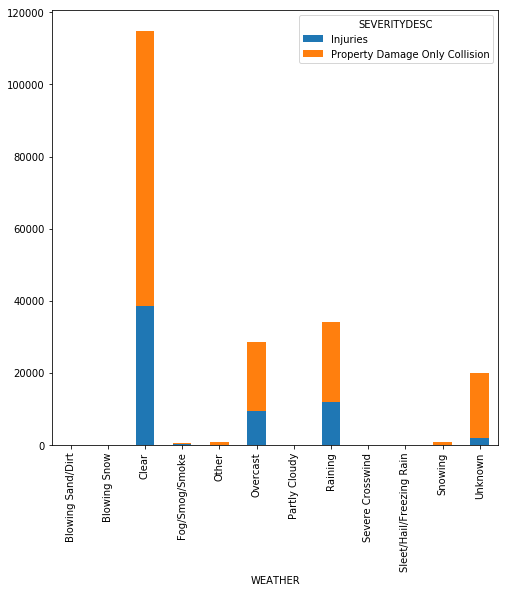

In [225]:
crosstab5.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [226]:
crosstab6=pd.crosstab(index=df_accidents["ROADCOND"],columns=df_accidents["SEVERITYDESC"])
crosstab6

SEVERITYDESC,Injuries,Property Damage Only Collision
ROADCOND,,
Dry,43155,85505
Ice,294,938
Oil,24,40
Other,46,90
Sand/Mud/Dirt,23,54
Snow/Slush,175,839
Standing Water,33,86
Unknown,1821,18224
Wet,16734,32000


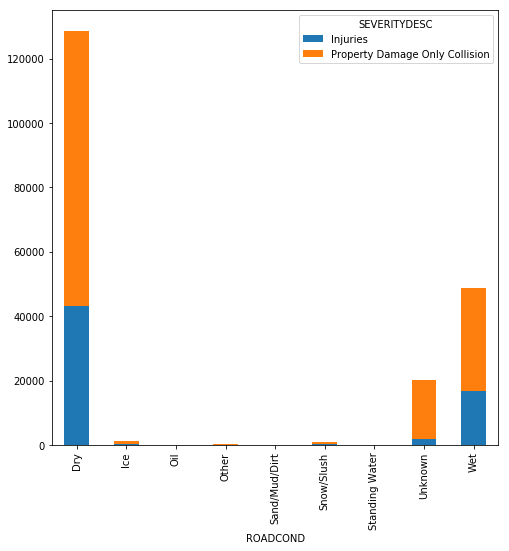

In [227]:
crosstab6.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [228]:
crosstab7=pd.crosstab(index=df_accidents["LIGHTCOND"],columns=df_accidents["SEVERITYDESC"])
crosstab7

SEVERITYDESC,Injuries,Property Damage Only Collision
LIGHTCOND,,
Dark - No Street Lights,366,1214
Dark - Street Lights Off,349,890
Dark - Street Lights On,15793,34346
Dark - Unknown Lighting,8,16
Dawn,903,1706
Daylight,41032,78520
Dusk,2088,3997
Other,58,186
Unknown,1708,16901


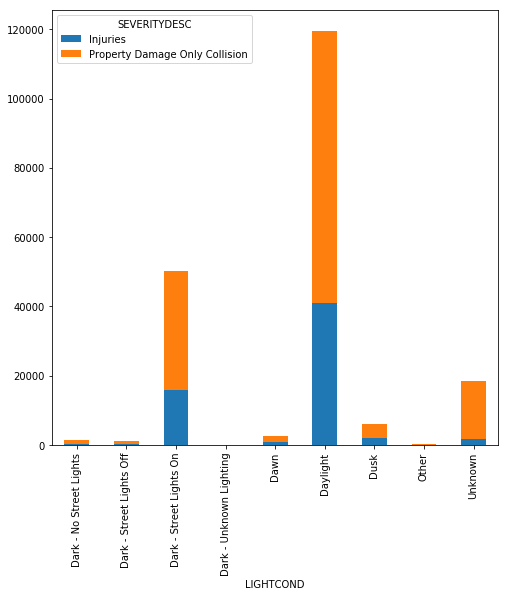

In [229]:
crosstab7.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [230]:
crosstab8=pd.crosstab(index=df_accidents["SPEEDING"],columns=df_accidents["SEVERITYDESC"])
crosstab8

SEVERITYDESC,Injuries,Property Damage Only Collision
SPEEDING,,
N,58260,131886
Y,4045,5890


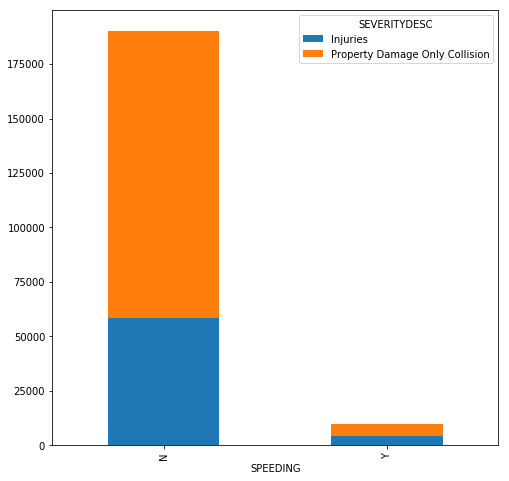

In [231]:
crosstab8.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [232]:
crosstab9=pd.crosstab(index=df_accidents["TIMEOFDAY"],columns=df_accidents["SEVERITYDESC"])
crosstab9

SEVERITYDESC,Injuries,Property Damage Only Collision
TIMEOFDAY,,
Late Night,12395,32746
Early Morning,6800,13800
Morning,10561,24476
Noon,15138,30635
Eve,12759,24581
Night,4652,11538


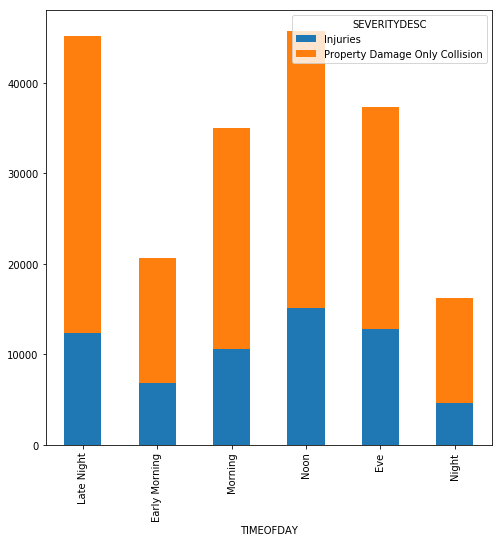

In [233]:
crosstab9.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [234]:
df_accidents

,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,Month,Weekday,Hour,Year,TIMEOFDAY
0,Intersection,Property Damage Only Collision,Angles,2,0,0,2,0,0,0,...,N,Clear,Dry,Daylight,N,1,6,9,2020,Morning
1,Block,Property Damage Only Collision,Rear Ended,2,0,0,2,0,0,0,...,N,Raining,Wet,Dusk,N,4,0,18,2005,Eve
2,Block,Injuries,Head On,2,0,0,2,1,0,0,...,N,Clear,Dry,Dark - Street Lights On,N,3,6,2,2013,Late Night
3,Intersection,Injuries,Pedestrian,3,1,0,1,1,0,0,...,N,Raining,Wet,Dark - Street Lights On,N,1,0,17,2020,Eve
4,Block,Injuries,Other,2,0,0,1,1,0,0,...,N,Clear,Ice,Dark - Street Lights On,Y,12,4,19,2009,Eve
5,Block,Property Damage Only Collision,Rear Ended,2,0,0,2,0,0,0,...,N,Clear,Dry,Daylight,N,8,3,12,2019,Morning
6,Block,Property Damage Only Collision,Cycles,3,0,1,1,0,0,0,...,N,Overcast,Dry,Daylight,N,8,3,8,2019,Early Morning
7,not mentioned,Property Damage Only Collision,Parked Car,0,0,0,2,0,0,0,...,N,Clear,Dry,Daylight,N,8,0,0,2007,Late Night
8,Block,Injuries,Rear Ended,3,0,0,3,3,1,0,...,N,Clear,Dry,Daylight,N,7,2,0,2005,Late Night
9,Block,Property Damage Only Collision,Rear Ended,2,0,0,2,0,0,0,...,N,Clear,Wet,Dusk,N,8,1,0,2004,Late Night


In [235]:
X=df_accidents

### CONVERTING CATEGORICAL TO NUMERICAL

In [236]:
from sklearn import preprocessing

addrtype = preprocessing.LabelEncoder()
addrtype.fit(X['ADDRTYPE'])
X['ADDRTYPE'] = addrtype.transform(X['ADDRTYPE'])

In [237]:
severitydesc = preprocessing.LabelEncoder()
severitydesc.fit(X['SEVERITYDESC'])
X['SEVERITYDESC'] = severitydesc.transform(X['SEVERITYDESC'])


In [238]:

roadcond = preprocessing.LabelEncoder()
roadcond.fit(X['ROADCOND'])
X['ROADCOND'] = roadcond.transform(X['ROADCOND'])


light = preprocessing.LabelEncoder()
light.fit(X['LIGHTCOND'])
X['LIGHTCOND'] = light.transform(X['LIGHTCOND'])


coll = preprocessing.LabelEncoder()
coll.fit(X['COLLISIONTYPE'])
X['COLLISIONTYPE'] = coll.transform(X['COLLISIONTYPE'])


In [239]:

inatt = preprocessing.LabelEncoder()
inatt.fit(X['INATTENTIONIND'])
X['INATTENTIONIND'] = inatt.transform(X['INATTENTIONIND'])

In [240]:

under = preprocessing.LabelEncoder()
under.fit(X['UNDERINFL'])
X['UNDERINFL'] = under.transform(X['UNDERINFL'])

In [241]:

speed = preprocessing.LabelEncoder()
speed.fit(X['SPEEDING'])
X['SPEEDING'] = speed.transform(X['SPEEDING'])

In [242]:

junct = preprocessing.LabelEncoder()
junct.fit(X['JUNCTIONTYPE'])
X['JUNCTIONTYPE'] = junct.transform(X['JUNCTIONTYPE'])

In [243]:

Weath= preprocessing.LabelEncoder()
Weath.fit(X['WEATHER'])
X['WEATHER'] = Weath.transform(X['WEATHER'])

In [244]:

coldesc= preprocessing.LabelEncoder()
coldesc.fit(X['SDOT_COLDESC'])
X['SDOT_COLDESC'] = coldesc.transform(X['SDOT_COLDESC'])

In [245]:
timeofday= preprocessing.LabelEncoder()
timeofday.fit(X['TIMEOFDAY'])
X['TIMEOFDAY'] = timeofday.transform(X['TIMEOFDAY'])

In [246]:
X.head()

,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,Month,Weekday,Hour,Year,TIMEOFDAY
0,2,1,0,2,0,0,2,0,0,0,...,0,2,0,5,0,1,6,9,2020,3
1,1,1,7,2,0,0,2,0,0,0,...,0,7,8,6,0,4,0,18,2005,1
2,1,0,2,2,0,0,2,1,0,0,...,0,2,0,2,0,3,6,2,2013,2
3,2,0,6,3,1,0,1,1,0,0,...,0,7,8,2,0,1,0,17,2020,1
4,1,0,4,2,0,0,1,1,0,0,...,0,2,1,2,1,12,4,19,2009,1


In [247]:
X.dtypes

ADDRTYPE           int64
SEVERITYDESC       int64
COLLISIONTYPE      int64
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
INJURIES           int64
SERIOUSINJURIES    int64
FATALITIES         int64
JUNCTIONTYPE       int64
SDOT_COLDESC       int64
INATTENTIONIND     int64
UNDERINFL          int64
WEATHER            int64
ROADCOND           int64
LIGHTCOND          int64
SPEEDING           int64
Month              int64
Weekday            int64
Hour               int64
Year               int64
TIMEOFDAY          int64
dtype: object

In [248]:
X.corr()

,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,Month,Weekday,Hour,Year,TIMEOFDAY
ADDRTYPE,1.000000,-0.174622,-0.411391,0.051671,0.128866,0.076718,-0.072319,0.143033,0.028552,0.006041,...,-0.025720,-0.039972,-0.007618,-0.013677,-0.060388,-0.003827,-0.013572,0.034788,0.045647,0.002301
SEVERITYDESC,-0.174622,1.000000,0.134377,-0.128840,-0.259243,-0.217701,0.066437,-0.811250,-0.150699,-0.059195,...,-0.002887,0.116744,0.056785,0.072484,-0.047263,-0.004907,0.013822,-0.033363,-0.021198,0.002452
COLLISIONTYPE,-0.411391,0.134377,1.000000,-0.008371,0.084968,-0.217427,-0.050447,-0.121456,-0.029578,-0.001138,...,0.239166,0.130717,0.055157,0.119641,-0.015385,0.007224,-0.020734,-0.075865,0.034336,-0.008052
PERSONCOUNT,0.051671,-0.128840,-0.008371,1.000000,-0.019100,-0.038827,0.384768,0.279332,0.105090,0.046716,...,-0.043323,-0.083521,-0.043407,-0.057154,0.000094,-0.001714,0.058322,0.044406,-0.062048,0.030224
PEDCOUNT,0.128866,-0.259243,0.084968,-0.019100,1.000000,-0.019364,-0.271275,0.159474,0.130918,0.071305,...,-0.009753,-0.023865,-0.002425,-0.052547,-0.031852,0.005313,-0.019543,0.032543,0.026530,-0.009579
PEDCYLCOUNT,0.076718,-0.217701,-0.217427,-0.038827,-0.019364,1.000000,-0.259373,0.115202,0.060822,0.010121,...,-0.032508,-0.062008,-0.056473,0.003551,-0.021703,0.006210,-0.025736,0.027543,0.033430,-0.025300
VEHCOUNT,-0.072319,0.066437,-0.050447,0.384768,-0.271275,-0.259373,1.000000,0.038893,-0.034312,-0.026950,...,-0.389877,-0.172459,-0.099768,-0.112808,-0.024986,-0.003156,0.011609,0.124776,-0.093937,0.051996
INJURIES,0.143033,-0.811250,-0.121456,0.279332,0.159474,0.115202,0.038893,1.000000,0.278269,0.065708,...,0.003510,-0.098715,-0.048244,-0.063800,0.053743,0.003419,0.006410,0.027788,0.006664,0.003102
SERIOUSINJURIES,0.028552,-0.150699,-0.029578,0.105090,0.130918,0.060822,-0.034312,0.278269,1.000000,0.170622,...,0.013434,-0.026340,-0.017422,-0.029223,0.039664,-0.000235,0.003085,0.002974,-0.002606,-0.004438
FATALITIES,0.006041,-0.059195,-0.001138,0.046716,0.071305,0.010121,-0.026950,0.065708,0.170622,1.000000,...,0.027895,-0.008754,-0.009127,-0.014525,0.041452,0.005096,0.005327,-0.004413,0.000706,-0.002847


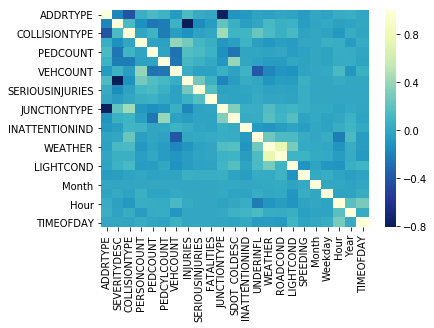

In [249]:
sns.heatmap(X.corr(), cmap='YlGnBu_r')
plt.show()

### BALANCING DATA

In [250]:
X['SEVERITYDESC'].value_counts().to_frame()

,SEVERITYDESC
1,137776
0,62305


In [251]:
from sklearn.utils import resample
df_max =X[X.SEVERITYDESC ==1]
df_min =X[X.SEVERITYDESC ==0]
df_max_ds = resample(df_max, 
                               replace = False,
                               n_samples= 62305,
                               random_state = 1234
                              )

df_balanceddata = pd.concat([df_max_ds,df_min])
df_balanceddata.SEVERITYDESC.value_counts()

1    62305
0    62305
Name: SEVERITYDESC, dtype: int64

In [252]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, jaccard_similarity_score , classification_report, confusion_matrix, f1_score


In [253]:
df_balanceddata.columns

Index(['ADDRTYPE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES', 'FATALITIES',
       'JUNCTIONTYPE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'Month', 'Weekday',
       'Hour', 'Year', 'TIMEOFDAY'],
      dtype='object')

From the parameters we included following features as the independant variables for the model development

'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT','JUNCTIONTYPE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'Month', 'Weekday',
       'Hour', 'Year', 'TIMEOFDAY' 
    and choose 'SEVERITYDESC as the dependant variable.   

In [254]:
x=df_balanceddata[['ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT','JUNCTIONTYPE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'Month', 'Weekday',
       'Hour', 'Year', 'TIMEOFDAY']].values
x[0:5]

array([[   1,    5,    2,    0,    0,    2,    4,   14,    0,    0,    5,
           8,    5,    0,   10,    0,   11, 2016,    3],
       [   1,    5,    2,    0,    0,    2,    4,   14,    1,    0,    2,
           0,    5,    0,    6,    3,   10, 2014,    3],
       [   1,    5,    2,    0,    0,    2,    4,   16,    0,    0,    2,
           0,    5,    0,    8,    4,    0, 2006,    2],
       [   1,    5,    2,    0,    0,    2,    4,   17,    1,    0,    7,
           8,    2,    0,   10,    3,    1, 2017,    2],
       [   2,    0,    2,    0,    0,    2,    1,   14,    0,    0,    2,
           0,    5,    0,    4,    1,    0, 2007,    2]])

In [255]:
y=df_balanceddata['SEVERITYDESC'].values

y[0:5]

array([1, 1, 1, 1, 1])

In [256]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


we split the balanced data into test and train group in the ratio of 30% to 70%.

In [257]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (87227, 19) (87227,)
Test set: (37383, 19) (37383,)


As ours is a classification problem, after splitting the data we are going to use various classification algorithms like , KNN, SVM,Logistic regression, Decission Tree, RandomForest Tree.

### K Nearest Neighbour(KNN)

In [131]:
Ks = 24
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];

In [258]:
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])          

In [259]:
print ( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.6817804884573202 with k= 22


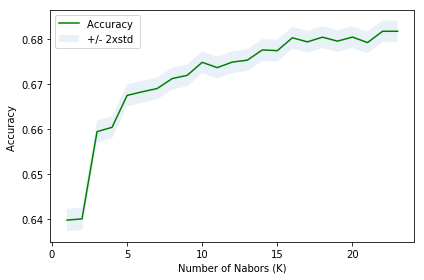

In [260]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 2xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [261]:
kP =22
neigh = KNeighborsClassifier(n_neighbors = kP).fit(x_train,y_train)
yhat = neigh.predict(x_test)
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Test set Accuracy:  0.6817804884573202


In [262]:
jaccard_KNN=jaccard_similarity_score(y_test, yhat)
jaccard_KNN

0.6817804884573202

In [263]:
jaccard_KNN=0.6817804884573202

In [264]:
f1_KNN=f1_score(y_test, yhat, average='weighted')
f1_KNN

0.6810747488035791

In [265]:
f1_KNN=0.6810747488035791

### DECISION TREE CLASSIFIER

In [266]:
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score
def validate_models(model):
    kfold = KFold(n_splits=10, random_state=42)
    results_1 = cross_val_score(model, x, y, cv=kfold)
    print("kfold cross_val_score: %.2f%%" % (results_1.mean()*100.0))
    
    skfold = StratifiedKFold(n_splits=3, random_state=100)
    results_2  = cross_val_score(model, x, y, cv=skfold)
    print("stratified kfold cross_val _score: %.2f%%" % (results_2.mean()*100.0))

In [267]:

Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [268]:
Tree.fit(x_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [269]:
predTree =Tree.predict(x_test)

In [270]:
jaccard_TREE=jaccard_similarity_score(y_test, predTree)
jaccard_TREE

0.7018430837546479

In [271]:
f1_TREE=f1_score(y_test, predTree, average='weighted')
f1_TREE

0.6999225611959199

In [272]:
print("DecisionTree Test set Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTree Test set Accuracy:  0.7018430837546479


In [273]:
validate_models(DecisionTreeClassifier(criterion='entropy', max_depth=5))

kfold cross_val_score: 38.58%
stratified kfold cross_val _score: 41.92%


### SVM-MODEL

In [274]:
clf1= svm.SVC(kernel='rbf')
clf1.fit(x_train, y_train)
SVM1= clf1.predict(x_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [275]:
clf2= svm.SVC(kernel='linear')
clf2.fit(x_train, y_train)
SVM2= clf2.predict(x_test)

In [276]:
clf3= svm.SVC(kernel='poly')
clf3.fit(x_train, y_train)
SVM3= clf3.predict(x_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [277]:
clf4= svm.SVC(kernel='sigmoid')
clf4.fit(x_train, y_train)
SVM4= clf4.predict(x_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [278]:
jaccard_SVMrbf=jaccard_similarity_score(y_test, SVM1)
jaccard_SVMrbf

0.6960918064360806

In [279]:
f1_SVMrbf=f1_score(y_test, SVM1, average='weighted')
f1_SVMrbf

0.6959770024510138

In [280]:
jaccard_SVMlinear=jaccard_similarity_score(y_test, SVM2)
jaccard_SVMlinear

0.6665596661584142

In [281]:
f1_SVMlinear=f1_score(y_test, SVM2, average='weighted')
f1_SVMlinear

0.6653047468731614

In [282]:
jaccard_SVMpolynomial=jaccard_similarity_score(y_test, SVM3)
jaccard_SVMpolynomial

0.6838134981141161

In [283]:
f1_SVMpolynomial=f1_score(y_test, SVM3, average='weighted')
f1_SVMpolynomial

0.6836113333527418

In [284]:
jaccard_SVMsigmoid=jaccard_similarity_score(y_test, SVM4)
jaccard_SVMsigmoid

0.5625819222641307

In [285]:
f1_SVMsigmoid=f1_score(y_test, SVM4, average='weighted')
f1_SVMsigmoid

0.5625745864798877

In [286]:
2

2

## 

### LOGISTIC REGRESSION MODEL

In [287]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
Yhat_LR = LR.predict(x_test)
Yhat_LR

array([1, 0, 0, ..., 1, 0, 0])

In [288]:
Yhat_prob = LR.predict_proba(x_test)

In [289]:
jaccard_LR=jaccard_similarity_score(y_test, Yhat_LR)
jaccard_LR

0.6617178931599925

In [290]:
f1_LR=f1_score(y_test, Yhat_LR, average='weighted')
f1_LR

0.6603962592696063

In [291]:
from sklearn.metrics import log_loss
log_loss_LR=log_loss(y_test, Yhat_prob)
log_loss_LR

0.5937387720017973

In [292]:
X['SEVERITYDESC'].value_counts()

1    137776
0     62305
Name: SEVERITYDESC, dtype: int64

In [293]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, Yhat_LR, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, Yhat_LR))



              precision    recall  f1-score   support

           0       0.68      0.60      0.64     18637
           1       0.65      0.72      0.68     18746

   micro avg       0.66      0.66      0.66     37383
   macro avg       0.66      0.66      0.66     37383
weighted avg       0.66      0.66      0.66     37383



In [297]:
ALGORITHM= ['KNN','SVM-rbf','SVM-linear','SVM-Polynomial','SVM-sigmoid','Logistic Regression','Decission Tree','RANDOM FOREST']

In [298]:
ACCURACY=['JACCARD,F1_SCORE','LOGLOSS']

In [299]:
JACCARD= [jaccard_KNN, jaccard_SVMrbf,jaccard_SVMlinear,jaccard_SVMpolynomial,jaccard_SVMsigmoid,jaccard_LR,jaccard_TREE,jaccard_RF]

In [300]:
F1_SCORE= [f1_KNN,f1_SVMrbf,f1_SVMlinear,f1_SVMpolynomial,f1_SVMsigmoid,f1_LR,f1_TREE,F1_RF]

In [301]:
LOG_LOSS=['NA', 'NA','NA','NA','NA',log_loss_LR,'NA','NA']

In [302]:
d={'ALGORITHM':ALGORITHM,'JACCARD':JACCARD,'F1-SCORE':F1_SCORE,'LOG LOSS':LOG_LOSS}

In [303]:
A_REPORT= pd.DataFrame(d)
A_REPORT




,ALGORITHM,JACCARD,F1-SCORE,LOG LOSS
0,KNN,0.681780,0.681075,NA
1,SVM-rbf,0.696092,0.695977,NA
2,SVM-linear,0.666560,0.665305,NA
3,SVM-Polynomial,0.683813,0.683611,NA
4,SVM-sigmoid,0.562582,0.562575,NA
5,Logistic Regression,0.661718,0.660396,0.593739
6,Decission Tree,0.701843,0.699923,NA
7,RANDOM FOREST,0.717438,0.699599,NA


In [294]:
forest_model1 = RandomForestClassifier(n_estimators=75,max_depth=12)
forest_model1.fit(x_train, y_train)
print(forest_model1)
yhat5 = forest_model1.predict(x_test)
print('the accuracy score for Random Forest Classifier is {}'.format(accuracy_score(y_test, yhat5)))


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
the accuracy score for Random Forest Classifier is 0.7174384078324372


In [295]:
jaccard_RF=jaccard_similarity_score(y_test, yhat5)
jaccard_RF

0.7174384078324372

In [296]:
F1_RF=f1_score(y_test, yhat5)
F1_RF

0.6995990103233513

### MODEL DEVELOPMENT WITH UNBALANCED DATA WITH RANDOM FOREST CLASSIFIER

In [304]:
B=X[['ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT','JUNCTIONTYPE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'Month', 'Weekday',
       'Hour', 'Year', 'TIMEOFDAY']]

In [305]:
x2=X[['ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT','JUNCTIONTYPE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'Month', 'Weekday',
       'Hour', 'Year', 'TIMEOFDAY']].values
x2[0:5]

array([[   2,    0,    2,    0,    0,    2,    1,   14,    0,    0,    2,
           0,    5,    0,    1,    6,    9, 2020,    3],
       [   1,    7,    2,    0,    0,    2,    4,   17,    1,    0,    7,
           8,    6,    0,    4,    0,   18, 2005,    1],
       [   1,    2,    2,    0,    0,    2,    4,   14,    0,    0,    2,
           0,    2,    0,    3,    6,    2, 2013,    2],
       [   2,    6,    3,    1,    0,    1,    1,   10,    0,    0,    7,
           8,    2,    0,    1,    0,   17, 2020,    1],
       [   1,    4,    2,    0,    0,    1,    4,   12,    0,    0,    2,
           1,    2,    1,   12,    4,   19, 2009,    1]])

In [306]:
y2=X['SEVERITYDESC'].values

y2[0:5]

array([1, 1, 0, 0, 0])

In [307]:
x2= preprocessing.StandardScaler().fit(x2).transform(x2.astype(float))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [308]:
x2_train, x2_test, y2_train, y2_test = train_test_split( x2, y2, test_size=0.3, random_state=4)
print ('Train set:', x2_train.shape,  y2_train.shape)
print ('Test set:', x2_test.shape,  y2_test.shape)

Train set: (140056, 19) (140056,)
Test set: (60025, 19) (60025,)


In [309]:
from sklearn.ensemble import RandomForestClassifier

In [310]:
forest_model = RandomForestClassifier(n_estimators=75,max_depth=12)
forest_model.fit(x2_train, y2_train)
print(forest_model)
yhat6 = forest_model.predict(x2_test)
print('the accuracy score for Random Forest Classifier is {}'.format(accuracy_score(y2_test, yhat6)))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
the accuracy score for Random Forest Classifier is 0.7561849229487714


In [311]:
cnf_matrix = confusion_matrix(y2_test, yhat6, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y2_test, yhat6))

              precision    recall  f1-score   support

           0       0.76      0.31      0.44     18580
           1       0.76      0.96      0.84     41445

   micro avg       0.76      0.76      0.76     60025
   macro avg       0.76      0.63      0.64     60025
weighted avg       0.76      0.76      0.72     60025



In [312]:
X.columns

Index(['ADDRTYPE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES', 'FATALITIES',
       'JUNCTIONTYPE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'Month', 'Weekday',
       'Hour', 'Year', 'TIMEOFDAY'],
      dtype='object')

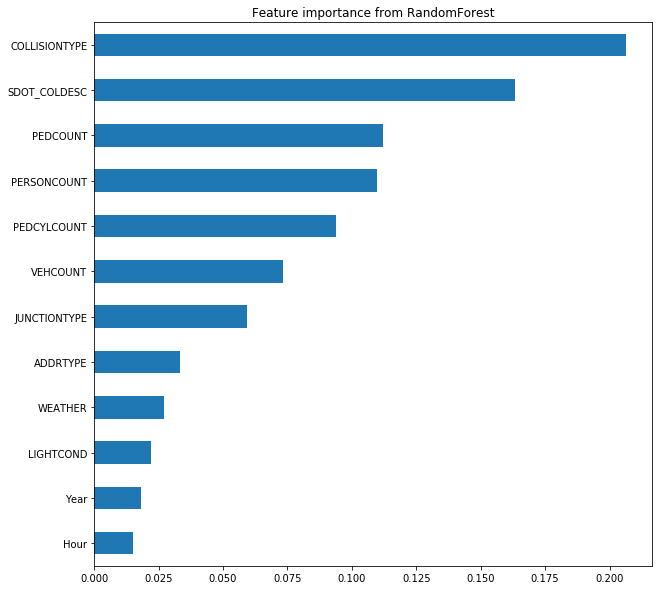

In [313]:
pd.Series(forest_model.feature_importances_, index = B.columns).nlargest(12).plot(kind = 'barh',
                                                                               figsize = (10, 10),
                                                                              title = 'Feature importance from RandomForest').invert_yaxis()

### MODEL INVOLVING DATA BY DROPING ALL UNKNOWN ,OTHER, NOT MENTIONED VARIABLES  to reduce the noise and including parameters like   x and Y

In [314]:
df.shape

(221738, 27)

In [315]:
df_new=df

In [316]:
df_new.replace(to_replace={'Unknown': np.nan, 
                        'Other':np.nan,'not mentioned':np.nan,'not stated':np.nan}, inplace=True)

In [317]:
df_new.isnull().sum()

X                   7478
Y                   7478
ADDRTYPE            3714
LOCATION            4593
SEVERITYDESC       21657
COLLISIONTYPE      24601
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INJURIES               0
SERIOUSINJURIES        0
FATALITIES             0
JUNCTIONTYPE       12000
SDOT_COLDESC           1
INATTENTIONIND         0
UNDERINFL              0
WEATHER            42632
ROADCOND           41835
LIGHTCOND          40507
SPEEDING               0
ST_COLDESC             0
Month                  0
Weekday                0
Hour                   0
Year                   0
TIMEOFDAY              0
dtype: int64

In [318]:
df_new2=df_new.dropna()

In [319]:
df_new2.shape

(148188, 27)

In [320]:
df_new2['SEVERITYDESC'].value_counts()

Property Damage Only Collision    95918
Injury Collision                  49581
Serious Injury Collision           2449
Fatality Collision                  240
Name: SEVERITYDESC, dtype: int64

In [321]:
df_new2['SEVERITYDESC'].replace(to_replace={'Property Damage Only Collision':'Property Damage Only Collision', 'Injury Collision':'Injuries','Serious Injury Collision':'Injuries','Fatality Collision':'Injuries'}, inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [322]:
df_new2.dtypes

X                   float64
Y                   float64
ADDRTYPE             object
LOCATION             object
SEVERITYDESC         object
COLLISIONTYPE        object
PERSONCOUNT           int64
PEDCOUNT              int64
PEDCYLCOUNT           int64
VEHCOUNT              int64
INJURIES              int64
SERIOUSINJURIES       int64
FATALITIES            int64
JUNCTIONTYPE         object
SDOT_COLDESC         object
INATTENTIONIND       object
UNDERINFL            object
WEATHER              object
ROADCOND             object
LIGHTCOND            object
SPEEDING             object
ST_COLDESC           object
Month                 int64
Weekday               int64
Hour                  int64
Year                  int64
TIMEOFDAY          category
dtype: object

As X and Y  (Latitude and longitude) and location point to the same information . we are going to use only X and Y and drop LOCATION.


In [323]:
df_new3=df_new2.drop('LOCATION',axis=1)

In [324]:
H=df_new3.drop('ST_COLDESC', axis=1)

In [325]:
addrtype2 = preprocessing.LabelEncoder()
addrtype2.fit(H['ADDRTYPE'])
H['ADDRTYPE'] = addrtype2.transform(H['ADDRTYPE'])

In [326]:
H.columns

Index(['X', 'Y', 'ADDRTYPE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'JUNCTIONTYPE', 'SDOT_COLDESC', 'INATTENTIONIND',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'Month',
       'Weekday', 'Hour', 'Year', 'TIMEOFDAY'],
      dtype='object')

In [327]:
A2 = preprocessing.LabelEncoder()
A2.fit(H['SEVERITYDESC'])
H['SEVERITYDESC'] = A2.transform(H['SEVERITYDESC'])

In [328]:
B2 = preprocessing.LabelEncoder()
B2.fit(H['COLLISIONTYPE'])
H['COLLISIONTYPE'] =B2.transform(H['COLLISIONTYPE'])

In [329]:
C2 = preprocessing.LabelEncoder()
C2.fit(H['JUNCTIONTYPE'])
H['JUNCTIONTYPE'] = C2.transform(H['JUNCTIONTYPE'])

In [330]:
D2 = preprocessing.LabelEncoder()
D2.fit(H['SDOT_COLDESC'])
H['SDOT_COLDESC'] = D2.transform(H['SDOT_COLDESC'])

In [331]:
E2 = preprocessing.LabelEncoder()
E2.fit(H['INATTENTIONIND'])
H['INATTENTIONIND'] = E2.transform(H['INATTENTIONIND'])

In [332]:
F2 = preprocessing.LabelEncoder()
F2.fit(H['UNDERINFL'])
H['UNDERINFL'] = F2.transform(H['UNDERINFL'])

In [333]:
G2 = preprocessing.LabelEncoder()
G2.fit(H['WEATHER'])
H['WEATHER'] = G2.transform(H['WEATHER'])

In [334]:
H2 = preprocessing.LabelEncoder()
H2.fit(H['ROADCOND'])
H['ROADCOND'] = H2.transform(H['ROADCOND'])

In [335]:
I2 = preprocessing.LabelEncoder()
I2.fit(H['LIGHTCOND'])
H['LIGHTCOND'] = I2.transform(H['LIGHTCOND'])

In [336]:
J2 = preprocessing.LabelEncoder()
J2.fit(H['SPEEDING'])
H['SPEEDING'] = J2.transform(H['SPEEDING'])

In [337]:
K2 = preprocessing.LabelEncoder()
K2.fit(H['TIMEOFDAY'])
H['TIMEOFDAY'] = K2.transform(H['TIMEOFDAY'])

In [338]:
H.head()

,X,Y,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,Month,Weekday,Hour,Year,TIMEOFDAY
0,-122.356511,47.517361,1,1,0,2,0,0,2,0,...,0,1,0,5,0,1,6,9,2020,3
1,-122.361405,47.702064,0,1,6,2,0,0,2,0,...,0,5,6,6,0,4,0,18,2005,1
2,-122.317414,47.664028,0,0,2,2,0,0,2,1,...,0,1,0,2,0,3,6,2,2013,2
3,-122.318234,47.619927,1,0,5,3,1,0,1,1,...,0,5,6,2,0,1,0,17,2020,1
5,-122.333067,47.544302,0,1,6,2,0,0,2,0,...,0,1,0,5,0,8,3,12,2019,3


In [339]:
H.dtypes

X                  float64
Y                  float64
ADDRTYPE             int64
SEVERITYDESC         int64
COLLISIONTYPE        int64
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INJURIES             int64
SERIOUSINJURIES      int64
FATALITIES           int64
JUNCTIONTYPE         int64
SDOT_COLDESC         int64
INATTENTIONIND       int64
UNDERINFL            int64
WEATHER              int64
ROADCOND             int64
LIGHTCOND            int64
SPEEDING             int64
Month                int64
Weekday              int64
Hour                 int64
Year                 int64
TIMEOFDAY            int64
dtype: object

In [340]:
H['SEVERITYDESC'].value_counts().to_frame()

,SEVERITYDESC
1,95918
0,52270


In [341]:
x3=H[['X','Y','ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT','JUNCTIONTYPE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'Month', 'Weekday',
       'Hour', 'Year', 'TIMEOFDAY']].values
x3[0:5]

array([[-1.22e+02,  4.75e+01,  1.00e+00,  0.00e+00,  2.00e+00,  0.00e+00,
         0.00e+00,  2.00e+00,  1.00e+00,  1.30e+01,  0.00e+00,  0.00e+00,
         1.00e+00,  0.00e+00,  5.00e+00,  0.00e+00,  1.00e+00,  6.00e+00,
         9.00e+00,  2.02e+03,  3.00e+00],
       [-1.22e+02,  4.77e+01,  0.00e+00,  6.00e+00,  2.00e+00,  0.00e+00,
         0.00e+00,  2.00e+00,  4.00e+00,  1.60e+01,  1.00e+00,  0.00e+00,
         5.00e+00,  6.00e+00,  6.00e+00,  0.00e+00,  4.00e+00,  0.00e+00,
         1.80e+01,  2.00e+03,  1.00e+00],
       [-1.22e+02,  4.77e+01,  0.00e+00,  2.00e+00,  2.00e+00,  0.00e+00,
         0.00e+00,  2.00e+00,  4.00e+00,  1.30e+01,  0.00e+00,  0.00e+00,
         1.00e+00,  0.00e+00,  2.00e+00,  0.00e+00,  3.00e+00,  6.00e+00,
         2.00e+00,  2.01e+03,  2.00e+00],
       [-1.22e+02,  4.76e+01,  1.00e+00,  5.00e+00,  3.00e+00,  1.00e+00,
         0.00e+00,  1.00e+00,  1.00e+00,  9.00e+00,  0.00e+00,  0.00e+00,
         5.00e+00,  6.00e+00,  2.00e+00,  0.00e+00,  1.00e+0

In [342]:
y3=H['SEVERITYDESC'].values

y3[0:5]

array([1, 1, 0, 0, 1])

In [343]:
x3= preprocessing.StandardScaler().fit(x3).transform(x3.astype(float))

In [344]:
x3_train, x3_test, y3_train, y3_test = train_test_split( x3, y3, test_size=0.3, random_state=4)
print ('Train set:', x3_train.shape,  y3_train.shape)
print ('Test set:', x3_test.shape,  y3_test.shape)

Train set: (103731, 21) (103731,)
Test set: (44457, 21) (44457,)


### KNN

In [345]:
Ks = 24
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];

In [346]:
for n in range(1,Ks):
    neigh3 = KNeighborsClassifier(n_neighbors = n).fit(x3_train,y3_train)
    yhat3=neigh3.predict(x3_test)
    mean_acc[n-1] = metrics.accuracy_score(y3_test, yhat3)
    std_acc[n-1]=np.std(yhat3==y3_test)/np.sqrt(yhat3.shape[0])   

In [347]:
print ( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.7224734012641428 with k= 23


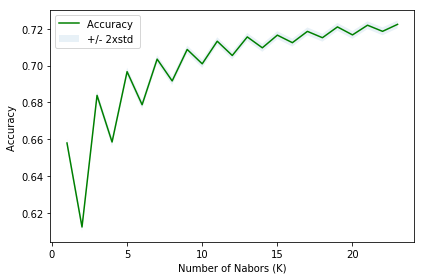

In [348]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 2xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [349]:
kP =23
neigh3 = KNeighborsClassifier(n_neighbors = kP).fit(x3_train,y3_train)
yhat3 = neigh3.predict(x3_test)
print("Test set Accuracy: ", metrics.accuracy_score(y3_test, yhat3))

Test set Accuracy:  0.7224734012641428


In [350]:
jaccard_KNN2=jaccard_similarity_score(y3_test, yhat3)
jaccard_KNN2

0.7224734012641428

In [351]:
jaccard_KNN2=0.7224734012641428

In [352]:
f1_KNN2=f1_score(y3_test, yhat3, average='weighted')
f1_KNN2

0.6965426757218426

In [353]:
f1_KNN2=0.6965426757218426

### SVM

In [354]:
clfA= svm.SVC(kernel='rbf')
clfA.fit(x3_train, y3_train)
SVMA= clfA.predict(x3_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [372]:
clfB= svm.SVC(kernel='linear')
clfB.fit(x3_train, y3_train)
SVMB= clfB.predict(x3_test)

In [373]:
clfC= svm.SVC(kernel='poly')
clfC.fit(x3_train, y3_train)
SVMC= clfC.predict(x3_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [374]:
clfD= svm.SVC(kernel='sigmoid')
clfD.fit(x3_train, y3_train)
SVMD= clfD.predict(x3_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [375]:
jaccard_SVMrbf2=jaccard_similarity_score(y3_test, SVMA)
jaccard_SVMrbf2

0.7305261263693007

In [376]:
f1_SVMrbf2=f1_score(y3_test, SVMA, average='weighted')
f1_SVMrbf2

0.6901087741492825

In [377]:
jaccard_SVMlinear2=jaccard_similarity_score(y3_test, SVMB)
jaccard_SVMlinear2

0.7217985918977888

In [378]:
f1_SVMlinear2=f1_score(y3_test, SVMB, average='weighted')
f1_SVMlinear2

0.6614570077804555

In [379]:
jaccard_SVMpoly2=jaccard_similarity_score(y3_test, SVMC)
jaccard_SVMpoly2

0.7284117236880582

In [380]:
f1_SVMpoly2=f1_score(y3_test, SVMC, average='weighted')
f1_SVMpoly2

0.6818625507207984

In [381]:
jaccard_SVMsigmoid2=jaccard_similarity_score(y3_test, SVMD)
jaccard_SVMsigmoid2

0.6168657354297411

In [382]:
f1_SVMsigmoid2=f1_score(y3_test, SVMD, average='weighted')
f1_SVMsigmoid2

0.6172715387814186

### DECISSION TREE

In [383]:
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score, validation_curve
def validate_models2(model):
    kfold2 = KFold(n_splits=10, random_state=42)
    results_1a = cross_val_score(model, x3, y3, cv=kfold2)
    print("kfold cross_val_score: %.2f%%" % (results_1a.mean()*100.0))
    
    skfold2 = StratifiedKFold(n_splits=3, random_state=100)
    results_2a  = cross_val_score(model, x3, y3, cv=skfold2)
    print("stratified kfold cross_val _score: %.2f%%" % (results_2a.mean()*100.0))

In [384]:
Tree2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [385]:
Tree2.fit(x3_train,y3_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [386]:
pred_Tree2=Tree2.predict(x3_test)

In [387]:
print("AccidentTrees's Accuracy: ", metrics.accuracy_score(y3_test, pred_Tree2))

AccidentTrees's Accuracy:  0.7231257169849518


In [388]:
jaccard_TREE2=jaccard_similarity_score(y3_test, pred_Tree2)
jaccard_TREE2

0.7231257169849518

In [389]:
f1_TREE2=f1_score(y3_test, pred_Tree2, average='weighted')
f1_TREE2

0.6973175121788694

In [390]:
validate_models2(DecisionTreeClassifier(criterion='entropy', max_depth=5))

kfold cross_val_score: 72.42%
stratified kfold cross_val _score: 72.12%


### LOGISTIC REGRESSION

In [391]:
LR2 = LogisticRegression(C=0.01, solver='liblinear').fit(x3_train,y3_train)
Yhat_LR2 = LR2.predict(x3_test)
Yhat_LR2


array([0, 1, 1, ..., 0, 1, 1])

In [392]:
Yhat_prob2 = LR2.predict_proba(x3_test)

In [393]:
jaccard_LR2=jaccard_similarity_score(y3_test, Yhat_LR2)
jaccard_LR2

0.7253975751850102

In [394]:
f1_LR2=f1_score(y3_test,Yhat_LR2 , average='weighted')
f1_LR2

0.6849803083700098

In [395]:
from sklearn.metrics import log_loss
log_loss_LR2=log_loss(y3_test, Yhat_prob2)
log_loss_LR2

0.5503454620135071

### RANDOMFOREST CLASSIFIER

In [396]:
forest_model2 = RandomForestClassifier(n_estimators=75,max_depth=12)
forest_model2.fit(x3_train, y3_train)
print(forest_model2)
yhat4 = forest_model2.predict(x3_test)
print('the accuracy score for Random Forest Classifier is {}'.format(accuracy_score(y3_test, yhat4)))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
the accuracy score for Random Forest Classifier is 0.7342375778842477


In [398]:
jaccard_RFA=jaccard_similarity_score(y3_test, yhat4)
jaccard_RFA

0.7342375778842477

In [399]:
f1_RFA=f1_score(y3_test,yhat4 , average='weighted')
f1_RFA

0.7002531668809976

In [397]:
# Compute confusion matrix
cnf_matrix2 = confusion_matrix(y3_test, Yhat_LR2, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y3_test, Yhat_LR2))



              precision    recall  f1-score   support

           0       0.77      0.30      0.44     15495
           1       0.72      0.95      0.82     28962

   micro avg       0.73      0.73      0.73     44457
   macro avg       0.74      0.63      0.63     44457
weighted avg       0.74      0.73      0.68     44457



In [400]:
ALGORITHM2= ['KNN','SVM-rbf','SVM-linear','SVM-Polynomial','SVM-sigmoid','Logistic Regression','Decission Tree','RANDOM FOREST']

In [401]:
JACCARD2= [jaccard_KNN2, jaccard_SVMrbf2,jaccard_SVMlinear2,jaccard_SVMpoly2,jaccard_SVMsigmoid2,jaccard_LR2,jaccard_TREE2,jaccard_RFA]

In [402]:
F1_SCORE2= [f1_KNN2,f1_SVMrbf2,f1_SVMlinear2,f1_SVMpoly2,f1_SVMsigmoid2,f1_LR2,f1_TREE2,f1_RFA]

In [403]:
LOG_LOSS2=['NA', 'NA','NA','NA','NA',log_loss_LR2,'NA','NA']

In [404]:
b={'ALGORITHM':ALGORITHM2,'JACCARD':JACCARD2,'F1-SCORE':F1_SCORE2,'LOG LOSS':LOG_LOSS2}

In [405]:
B_REPORT= pd.DataFrame(b)
B_REPORT


,ALGORITHM,JACCARD,F1-SCORE,LOG LOSS
0,KNN,0.722473,0.696543,NA
1,SVM-rbf,0.730526,0.690109,NA
2,SVM-linear,0.721799,0.661457,NA
3,SVM-Polynomial,0.728412,0.681863,NA
4,SVM-sigmoid,0.616866,0.617272,NA
5,Logistic Regression,0.725398,0.684980,0.550345
6,Decission Tree,0.723126,0.697318,NA
7,RANDOM FOREST,0.734238,0.700253,NA


In [214]:
cnf_matrixsvm1 = confusion_matrix(y3_test, SVMA, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y3_test, SVMA))


              precision    recall  f1-score   support

           0       0.79      0.31      0.44     15495
           1       0.72      0.96      0.82     28962

   micro avg       0.73      0.73      0.73     44457
   macro avg       0.76      0.63      0.63     44457
weighted avg       0.75      0.73      0.69     44457



### FATALITY DATA

In [183]:
B=df
C=B.groupby('SEVERITYDESC')
D=C.get_group('Fatality Collision')
D.shape

(352, 27)

In [184]:
D.columns

Index(['X', 'Y', 'ADDRTYPE', 'LOCATION', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES',
       'SERIOUSINJURIES', 'FATALITIES', 'JUNCTIONTYPE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'SPEEDING', 'ST_COLDESC', 'Month', 'Weekday', 'Hour', 'Year',
       'TIMEOFDAY'],
      dtype='object')

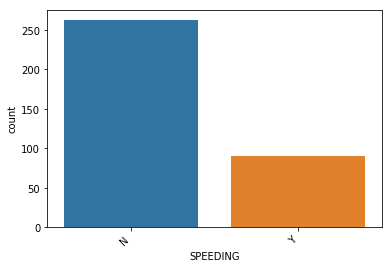

In [185]:
ax2 = sns.countplot(D['SPEEDING'])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

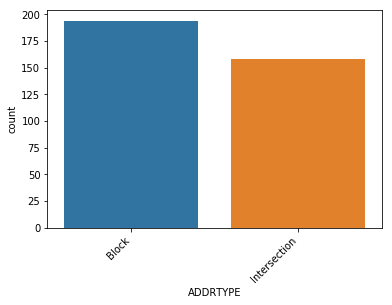

In [186]:
ax2 = sns.countplot(D['ADDRTYPE'])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

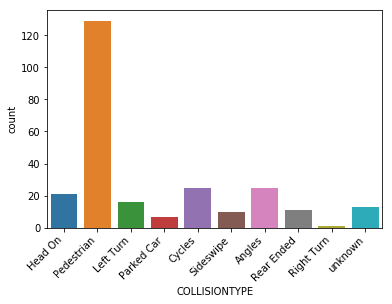

In [187]:
ax2 = sns.countplot(D['COLLISIONTYPE'])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

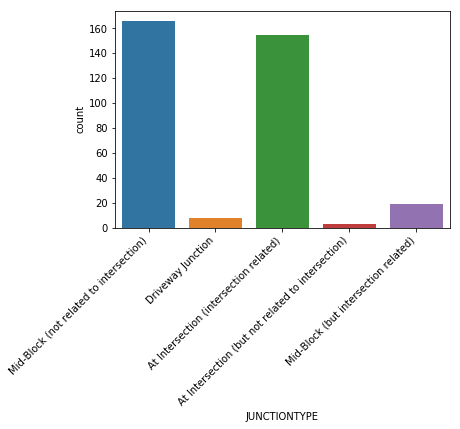

In [188]:
ax2 = sns.countplot(D['JUNCTIONTYPE'])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

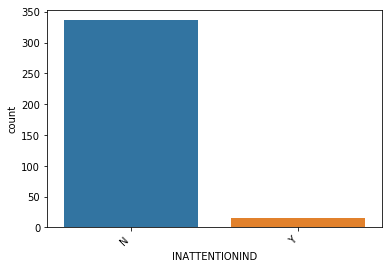

In [189]:
ax2 = sns.countplot(D['INATTENTIONIND'])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

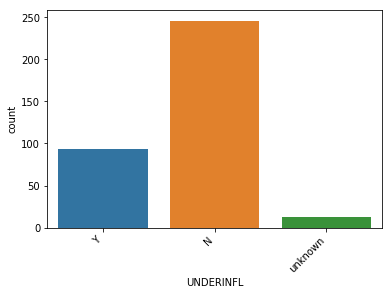

In [190]:
ax2 = sns.countplot(D['UNDERINFL'])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

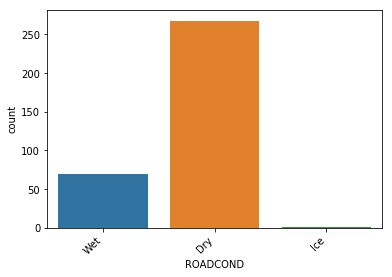

In [191]:
ax2 = sns.countplot(D['ROADCOND'])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

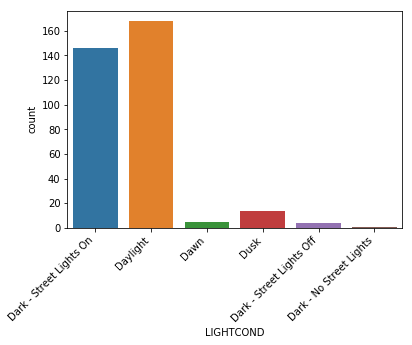

In [192]:
ax2 = sns.countplot(D['LIGHTCOND'])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

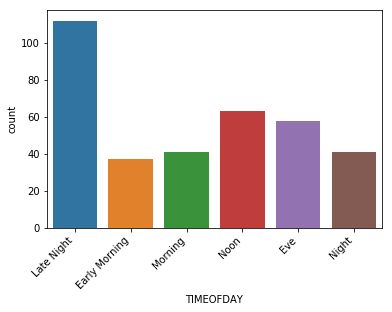

In [193]:
ax2 = sns.countplot(D['TIMEOFDAY'])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

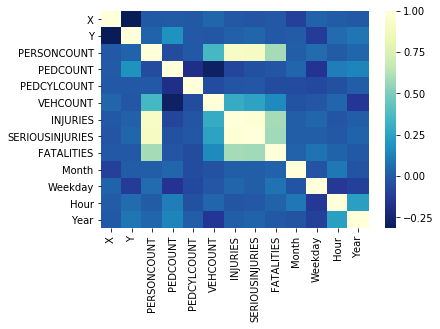

In [194]:
sns.heatmap(D.corr(), cmap='YlGnBu_r')
plt.show()